In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
comments = pd.read_csv('C:/Python - Dream-comes-true/Youtube Analysis/UScomments.csv', on_bad_lines='skip', low_memory=False)
comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          1
dtype: int64

In [5]:
comments.dropna(inplace=True)

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
from textblob import TextBlob

In [8]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [9]:
print(TextBlob('It is a good day').sentiment.polarity)

0.7


In [10]:
popularity = []
for i in comments['comment_text']:
    try:
        popularity.append(TextBlob(i).sentiment.polarity)
    except:
        popularity.append(0)

In [11]:
len(popularity)

691367

In [12]:
comments['popularity'] = popularity

In [13]:
comments.head()

,video_id,comment_text,likes,replies,popularity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
filter1 = comments['popularity'] == 1

In [16]:
comments_positive = comments[filter1]

In [17]:
filter2 = comments['popularity'] == -1

In [18]:
comments_negative = comments[filter2]

In [19]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [20]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691389                                               Лучшая
691390    qu'est ce que j'aimerais que tu viennes à Roan...
691391                            Ven a mexico! 😍 te amo LP
691392                                      Islığı yeter...
691393    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691367, dtype: object

In [21]:
type(comments['comment_text'])

pandas.core.series.Series

In [22]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [23]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

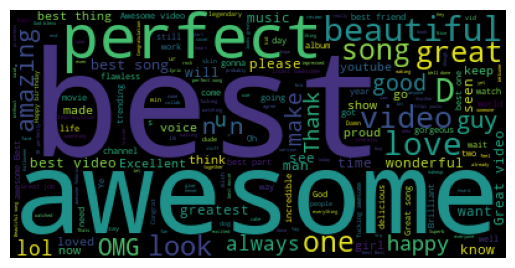

In [24]:
plt.imshow(wordcloud)
plt.axis('off')

In [25]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
wordcloud2 = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

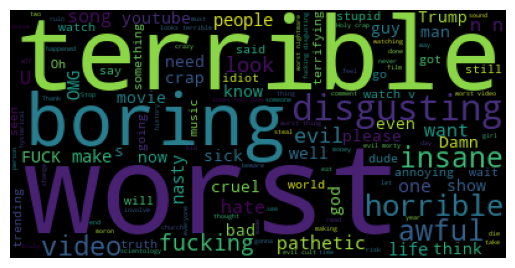

In [26]:
plt.imshow(wordcloud2)
plt.axis('off')

In [27]:
import emoji

In [28]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [29]:
all_emoji_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [30]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [31]:
from collections import Counter

In [32]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33452),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5148)]

In [33]:
emojis_symbol = [Counter(all_emoji_list).most_common(10)[i][0] for i in range (10)]
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range (10)]

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

In [35]:
trace = go.Bar(x=emojis_symbol, y=freqs)

In [36]:
import nbformat
print(nbformat.__version__)
iplot([trace])

5.10.4


In [37]:
import os

In [38]:
files = os.listdir(r'C:/Python - Dream-comes-true/Youtube Analysis/additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [39]:
files_csv = [file for file in files if '.csv' in file]

In [40]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
full_df = pd.DataFrame()
path = r'C:/Python - Dream-comes-true/Youtube Analysis/additional_data'

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding = 'iso-8859-1', on_bad_lines=F'skip')
    full_df = pd.concat([full_df, current_df], ignore_index = True)

full_df.shape


(375942, 16)

In [42]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [45]:
full_df.drop_duplicates(inplace=True)
full_df.shape
print(full_df.head())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

In [48]:
full_df.to_csv(r'C:/Python - Dream-comes-true/Youtube Analysis/Total_Youtube_Analysis.csv', index = False)

In [49]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///C:/Users/hangu/OneDrive/Python - Dream-comes-true/Youtube Analysis/youtube_sample.sqlite')

In [50]:
res = full_df.to_sql('Users2', con=engine, if_exists='append')
from sqlalchemy import text
with engine.connect() as conn:
   conn.execute(text("SELECT * FROM Users2")).fetchall()

In [51]:
json_df = pd.read_json("C:/Python - Dream-comes-true/Youtube Analysis/additional_data/US_category_id.json")
cat_dict ={}


for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

#print(cat_dict)

[10 23 24 25 22 26  1 28 20 17 29 15 19  2 27 43 30 44]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

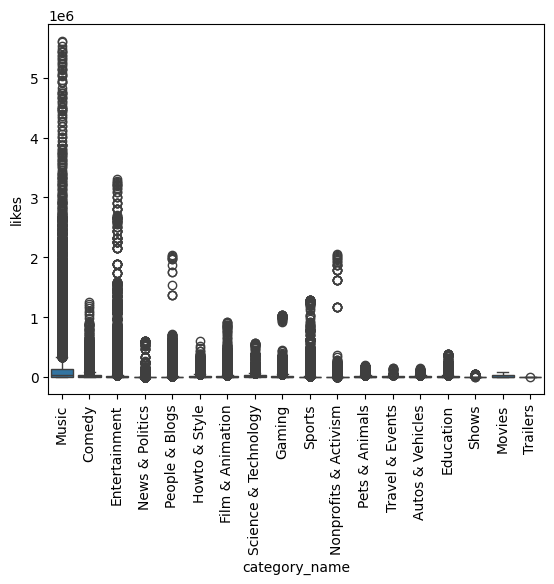

In [54]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df.head()
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 90)

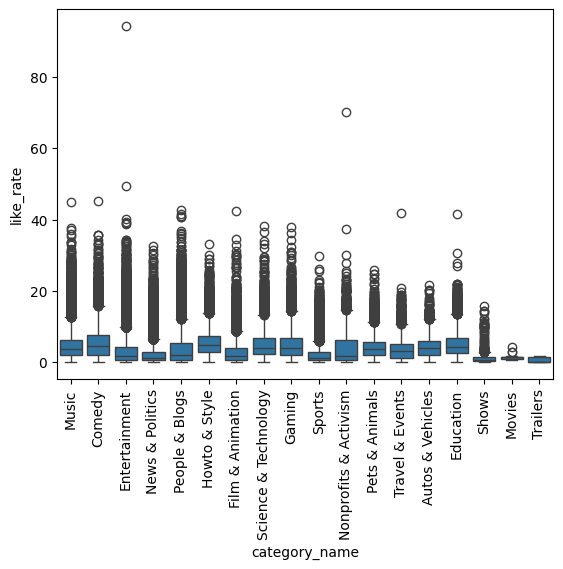

In [59]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100    
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_rate'] = (full_df['comment_count']/full_df['views'])*100

sns.boxplot(x = 'category_name', y = 'like_rate', data = full_df)
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

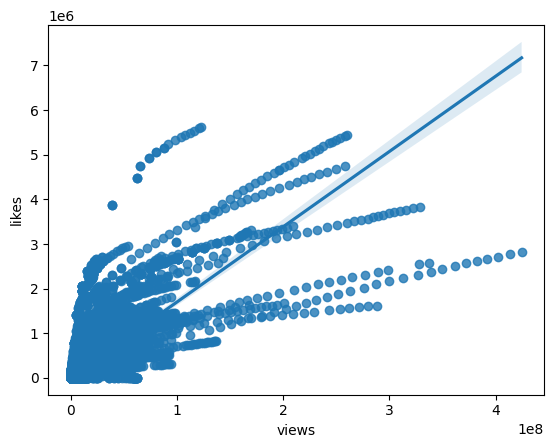

In [61]:
sns.regplot(x = 'views', y = 'likes', data = full_df)

In [63]:
full_df[['views', 'likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

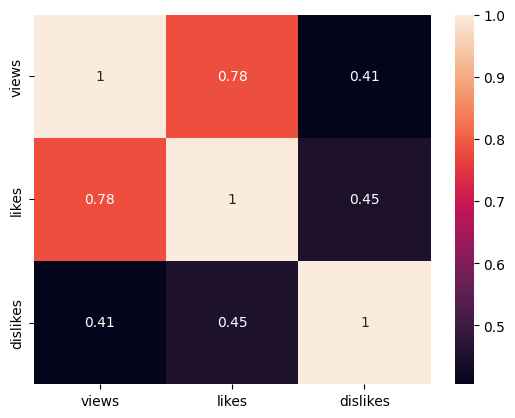

In [64]:
sns.heatmap(full_df[['views', 'likes','dislikes']].corr(), annot = True)

In [91]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False). reset_index()
cdf = cdf.rename(columns = {0:'total_videos'})

In [93]:
import plotly.express as px
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'total_videos', title = 'Top 10 Channels with Most Videos')

In [96]:
full_df['title'][0]
import string

In [99]:
string.punctuation
len([char for char in full_df['title'][0] if char in string.punctuation])
    

4

In [106]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

full_df['count_punc'] = full_df['title'].apply(punc_count)

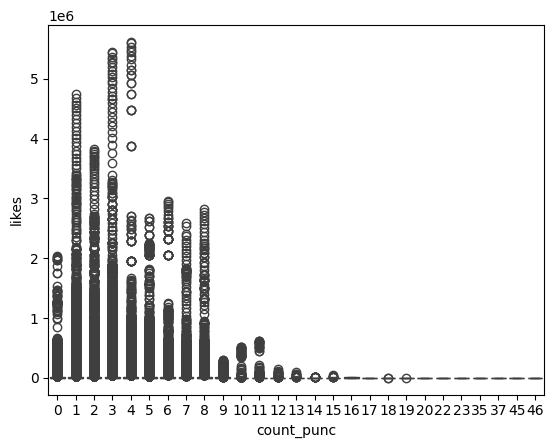

In [109]:
sns.boxplot(x = 'count_punc', y = 'likes', data = full_df)
plt.show()